# Autoencoders

# 2 types of autoencoders are described using the Keras framework

1. Vanilla (one layer) autoencoders 
2. Multilayer autoencoder
all with softmax to classify

## Import the libraries

In [15]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.models import Sequential
from keras import regularizers
from keras.regularizers import l2
from keras.utils import np_utils

## Load the data

We don't need the labels as the autoencoders are unsupervised network

## Preprocess

In [174]:
from preprocessing import preprocess_autoencoder_data

In [175]:
data = preprocess_autoencoder_data(r'C:\Users\l_alm\resnet1d-master\content\customerTargeting.csv')

In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Split into training and test sets (80% train, 20% test)
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# Print shape to verify
print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")


Train Shape: (5296, 70), Test Shape: (1324, 70)


# **Vanilla Autoencoder**

### Create the network

The first network is the most simple autoencoder. It has three layers Input - encoder - decoder

In [177]:
input_size = 70
hidden_size = 1000
bottleneck_size = 500 
output_size = 70

In [178]:


input_layer = Input(shape=(input_size,))

encoder = Dense(hidden_size, activation="relu")(input_layer)


bottleneck = Dense(bottleneck_size, activation="relu")(encoder) 


decoder = Dense(hidden_size, activation="relu")(bottleneck)

output_layer = Dense(input_size, activation="sigmoid")(decoder)  

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=1e-5), loss='mse')

### Train

In [179]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = autoencoder.fit(X_train, X_train, epochs=200, batch_size=128, validation_data=(X_test, X_test), callbacks=[early_stopping])

Epoch 1/200
42/42 [==============================] - 1s 15ms/step - loss: 1.2328 - val_loss: 1.1923
Epoch 2/200
42/42 [==============================] - 0s 12ms/step - loss: 1.1913 - val_loss: 1.1473
Epoch 3/200
42/42 [==============================] - 0s 11ms/step - loss: 1.1389 - val_loss: 1.0891
Epoch 4/200
42/42 [==============================] - 0s 12ms/step - loss: 1.0738 - val_loss: 1.0214
Epoch 5/200
42/42 [==============================] - 0s 11ms/step - loss: 1.0047 - val_loss: 0.9553
Epoch 6/200
42/42 [==============================] - 0s 12ms/step - loss: 0.9421 - val_loss: 0.8987
Epoch 7/200
42/42 [==============================] - 0s 11ms/step - loss: 0.8896 - val_loss: 0.8517
Epoch 8/200
42/42 [==============================] - 0s 11ms/step - loss: 0.8466 - val_loss: 0.8129
Epoch 9/200
42/42 [==============================] - 1s 12ms/step - loss: 0.8119 - val_loss: 0.7819
Epoch 10/200
42/42 [==============================] - 1s 12ms/step - loss: 0.7845 - val_loss: 0.7576

### Predict on the test set

In [180]:
decoded = autoencoder.predict(X_test)

42/42 [==============================] - 0s 4ms/step


### Plot

### Plot the losses

dict_keys(['loss', 'val_loss'])


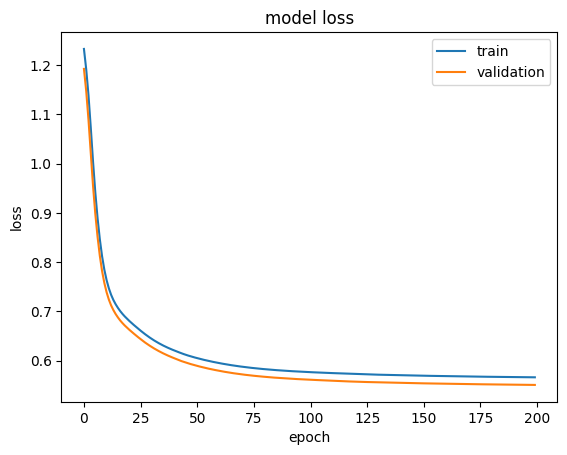

In [181]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [193]:
from keras.models import Model

#extracting encoder part from trained autoencoder
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=2).output)  #bottleneck layer


In [194]:
X_train_encoded = encoder_model.predict(X_train)  #ncode training data
X_test_encoded = encoder_model.predict(X_test)  #encode test data


42/42 [==============================] - 0s 2ms/step


In [195]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

#defining a classifier using the encoded features
classifier = Sequential([
    Dense(3, activation="softmax")  #output layer (3 classes)
])

# Compile the classifier
classifier.compile(optimizer=Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy')


In [196]:
import pandas as pd
df = pd.read_csv(r'C:\Users\l_alm\resnet1d-master\content\customerTargeting.csv')
y = df["target"]  
import numpy as np


y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)
#compute class weights
#class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
#class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))} improves performance in classes 0 and 2 but lowers the performance
#print("class Weights:", class_weights_dict)
# Train classifier
#early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True) tried it and it wasnt giving good results
history=classifier.fit(X_train_encoded, y_train, epochs=200, batch_size=30, validation_data=(X_test_encoded, y_test))



Epoch 1/200
177/177 [==============================] - 1s 2ms/step - loss: 1.3839 - val_loss: 1.2149
Epoch 2/200
177/177 [==============================] - 0s 2ms/step - loss: 1.1535 - val_loss: 1.1352
Epoch 3/200
177/177 [==============================] - 0s 1ms/step - loss: 1.1170 - val_loss: 1.1261
Epoch 4/200
177/177 [==============================] - 0s 1ms/step - loss: 1.1073 - val_loss: 1.1178
Epoch 5/200
177/177 [==============================] - 0s 1ms/step - loss: 1.0991 - val_loss: 1.1096
Epoch 6/200
177/177 [==============================] - 0s 1ms/step - loss: 1.0918 - val_loss: 1.1021
Epoch 7/200
177/177 [==============================] - 0s 1ms/step - loss: 1.0846 - val_loss: 1.0951
Epoch 8/200
177/177 [==============================] - 0s 1ms/step - loss: 1.0782 - val_loss: 1.0903
Epoch 9/200
177/177 [==============================] - 0s 1ms/step - loss: 1.0720 - val_loss: 1.0845
Epoch 10/200
177/177 [==============================] - 0s 2ms/step - loss: 1.0664 - val_lo

dict_keys(['loss', 'val_loss'])


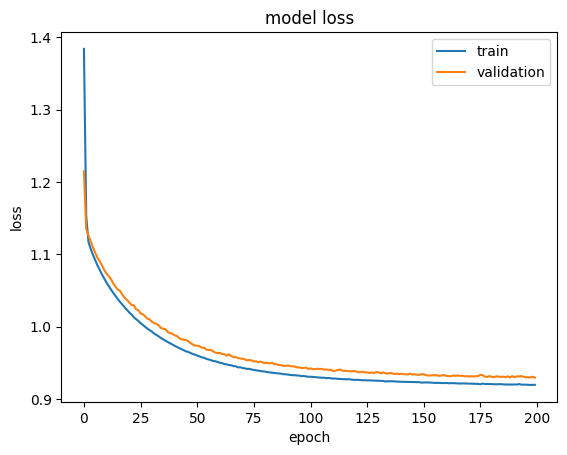

In [197]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [198]:
from sklearn.metrics import classification_report


y_pred_prob = classifier.predict(X_test_encoded)

#converting to class labels
y_pred = y_pred_prob.argmax(axis=1)  #getting class with highest probability

print(classification_report(y_test, y_pred, digits=4))


42/42 [==============================] - 0s 854us/step
              precision    recall  f1-score   support

           0     0.3625    0.0884    0.1422       328
           1     0.5988    0.8377    0.6984       604
           2     0.5739    0.5842    0.5790       392

    accuracy                         0.5770      1324
   macro avg     0.5118    0.5034    0.4732      1324
weighted avg     0.5329    0.5770    0.5253      1324



---

# **Multilayer autoencoder**

trying 2 layers 

In [199]:
input_size = 70
hidden_size1= 1000
hidden_size2= 1000
bottleneck_size= 500
output_size = 70

input_layer = Input(shape=(input_size,))
encoder = Dense(hidden_size1, activation="relu")(input_layer)
encoder = Dense(hidden_size2, activation="relu")(encoder)
bottleneck = Dense(bottleneck_size, activation="relu")(encoder)  


decoder = Dense(hidden_size2, activation="relu")(bottleneck)
decoder = Dense(hidden_size1, activation="relu")(decoder)
output_layer = Dense(output_size, activation="sigmoid")(decoder) 

autoencoder2 = Model(inputs=input_layer, outputs=output_layer)
autoencoder2.compile(optimizer='adam', loss='mse')

### Train the network

In [200]:

history = autoencoder2.fit(X_train, X_train, batch_size=30, epochs=200, verbose=1, validation_data=(X_test, X_test))

Epoch 1/200
177/177 [==============================] - 6s 30ms/step - loss: 0.7299 - val_loss: 0.6612
Epoch 2/200
177/177 [==============================] - 5s 31ms/step - loss: 0.6497 - val_loss: 0.6098
Epoch 3/200
177/177 [==============================] - 5s 30ms/step - loss: 0.6157 - val_loss: 0.5917
Epoch 4/200
177/177 [==============================] - 5s 30ms/step - loss: 0.6037 - val_loss: 0.5840
Epoch 5/200
177/177 [==============================] - 5s 31ms/step - loss: 0.5958 - val_loss: 0.5790
Epoch 6/200
177/177 [==============================] - 5s 30ms/step - loss: 0.5908 - val_loss: 0.5747
Epoch 7/200
177/177 [==============================] - 6s 31ms/step - loss: 0.5883 - val_loss: 0.5719
Epoch 8/200
177/177 [==============================] - 6s 32ms/step - loss: 0.5853 - val_loss: 0.5712
Epoch 9/200
177/177 [==============================] - 6s 31ms/step - loss: 0.5815 - val_loss: 0.5679
Epoch 10/200
177/177 [==============================] - 5s 31ms/step - loss: 0.578

### Predict on the test set

In [201]:
decoded_output= autoencoder2.predict(X_test)

42/42 [==============================] - 0s 7ms/step


### Plot the losses

dict_keys(['loss', 'val_loss'])


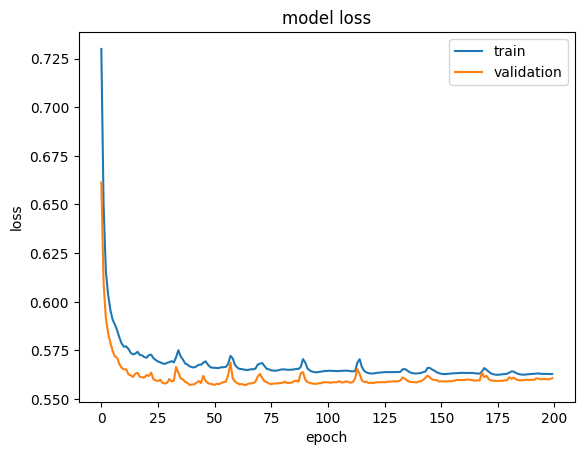

In [202]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [205]:
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=3).output)  #bottleneck layer

In [207]:
#defining a classifier using the encoded features
classifier = Sequential([
    Dense(3, activation="softmax")  #output layer (3 classes)
])

# Compile the classifier
classifier.compile(optimizer=Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy')


In [208]:
df = pd.read_csv(r'C:\Users\l_alm\resnet1d-master\content\customerTargeting.csv')
y = df["target"]  
import numpy as np


y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)
#compute class weights
#class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
#class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))} improves performance in classes 0 and 2 but lowers the performance
#print("class Weights:", class_weights_dict)
# Train classifier
#early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True) tried it and it wasnt giving good results
history=classifier.fit(X_train_encoded, y_train, epochs=200, batch_size=30, validation_data=(X_test_encoded, y_test))



Epoch 1/200
177/177 [==============================] - 0s 2ms/step - loss: 1.8907 - val_loss: 1.6272
Epoch 2/200
177/177 [==============================] - 0s 1ms/step - loss: 1.4250 - val_loss: 1.2790
Epoch 3/200
177/177 [==============================] - 0s 1ms/step - loss: 1.2246 - val_loss: 1.1699
Epoch 4/200
177/177 [==============================] - 0s 2ms/step - loss: 1.1668 - val_loss: 1.1316
Epoch 5/200
177/177 [==============================] - 0s 1ms/step - loss: 1.1358 - val_loss: 1.1042
Epoch 6/200
177/177 [==============================] - 0s 1ms/step - loss: 1.1110 - val_loss: 1.0819
Epoch 7/200
177/177 [==============================] - 0s 1ms/step - loss: 1.0893 - val_loss: 1.0633
Epoch 8/200
177/177 [==============================] - 0s 1ms/step - loss: 1.0716 - val_loss: 1.0477
Epoch 9/200
177/177 [==============================] - 0s 1ms/step - loss: 1.0566 - val_loss: 1.0355
Epoch 10/200
177/177 [==============================] - 0s 1ms/step - loss: 1.0445 - val_lo

# plot

dict_keys(['loss', 'val_loss'])


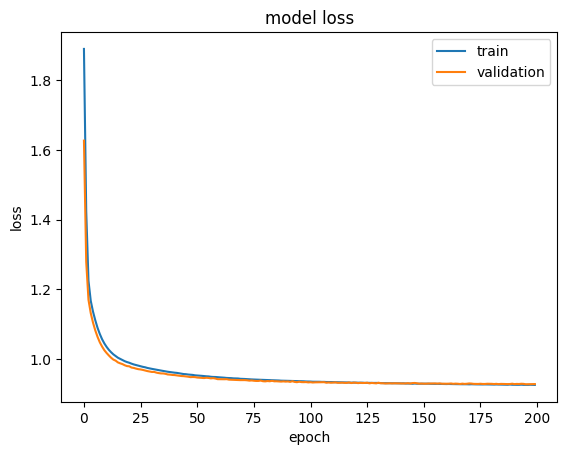

In [209]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [210]:
from sklearn.metrics import classification_report


y_pred_prob = classifier.predict(X_test_encoded)

#converting to class labels
y_pred = y_pred_prob.argmax(axis=1)  #getting class with highest probability

print(classification_report(y_test, y_pred, digits=4))

42/42 [==============================] - 0s 789us/step
              precision    recall  f1-score   support

           0     0.3333    0.0610    0.1031       328
           1     0.5939    0.8377    0.6951       604
           2     0.5680    0.5969    0.5821       392

    accuracy                         0.5740      1324
   macro avg     0.4984    0.4986    0.4601      1324
weighted avg     0.5217    0.5740    0.5150      1324



# SMOTE with Simple Autoencoder

In [5]:
from preprocessing import preprocess_autoencoder_data_with_smote
X_train_resampled, X_test, y_train_resampled, y_test = preprocess_autoencoder_data_with_smote(r'C:\Users\l_alm\resnet1d-master\content\customerTargeting.csv')

In [2]:
input_size = 70
hidden_size = 1000
bottleneck_size = 500 
output_size = 70

In [10]:

input_layer = Input(shape=(input_size,))

encoder = Dense(hidden_size, activation="relu")(input_layer)


bottleneck = Dense(bottleneck_size, activation="relu")(encoder) 


decoder = Dense(hidden_size, activation="relu")(bottleneck)

output_layer = Dense(input_size, activation="sigmoid")(decoder)  

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=1e-5), loss='mse')

In [11]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = autoencoder.fit(X_train_resampled, X_train_resampled, epochs=200, batch_size=128, validation_data=(X_test, X_test), callbacks=[early_stopping])

Epoch 1/200
58/58 [==============================] - 1s 12ms/step - loss: 1.2078 - val_loss: 1.2065
Epoch 2/200
58/58 [==============================] - 1s 10ms/step - loss: 1.1480 - val_loss: 1.1386
Epoch 3/200
58/58 [==============================] - 1s 10ms/step - loss: 1.0628 - val_loss: 1.0451
Epoch 4/200
58/58 [==============================] - 1s 10ms/step - loss: 0.9596 - val_loss: 0.9495
Epoch 5/200
58/58 [==============================] - 1s 10ms/step - loss: 0.8705 - val_loss: 0.8747
Epoch 6/200
58/58 [==============================] - 1s 10ms/step - loss: 0.8069 - val_loss: 0.8207
Epoch 7/200
58/58 [==============================] - 1s 10ms/step - loss: 0.7634 - val_loss: 0.7823
Epoch 8/200
58/58 [==============================] - 1s 10ms/step - loss: 0.7332 - val_loss: 0.7552
Epoch 9/200
58/58 [==============================] - 1s 10ms/step - loss: 0.7118 - val_loss: 0.7357
Epoch 10/200
58/58 [==============================] - 1s 10ms/step - loss: 0.6964 - val_loss: 0.7218

# Plot

dict_keys(['loss', 'val_loss'])


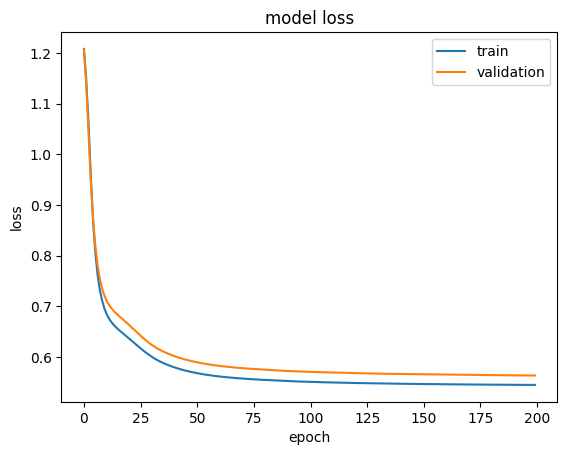

In [12]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

# Classification with softmax

In [14]:
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=2).output)

#transforming train , test data
X_train_encoded = encoder_model.predict(X_train_resampled)
X_test_encoded = encoder_model.predict(X_test)

42/42 [==============================] - 0s 2ms/step


In [18]:

classifier = Sequential([
    Dense(3, activation="softmax", input_shape=(X_train_encoded.shape[1],)) 
])

classifier.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


classifier.fit(X_train_encoded, y_train_resampled, epochs=200, batch_size=30, validation_data=(X_test_encoded, y_test))

Epoch 1/200
247/247 [==============================] - 1s 1ms/step - loss: 1.2710 - accuracy: 0.3573 - val_loss: 1.1101 - val_accuracy: 0.4532
Epoch 2/200
247/247 [==============================] - 0s 1ms/step - loss: 1.1002 - accuracy: 0.4482 - val_loss: 1.0681 - val_accuracy: 0.4592
Epoch 3/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0508 - accuracy: 0.4724 - val_loss: 1.0256 - val_accuracy: 0.4804
Epoch 4/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0212 - accuracy: 0.4803 - val_loss: 1.0177 - val_accuracy: 0.4766
Epoch 5/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0009 - accuracy: 0.4945 - val_loss: 0.9824 - val_accuracy: 0.4894
Epoch 6/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9867 - accuracy: 0.4987 - val_loss: 0.9793 - val_accuracy: 0.5030
Epoch 7/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9779 - accuracy: 0.5055 - val_loss: 0.9728 - val_accuracy: 0.5136

dict_keys(['loss', 'val_loss'])


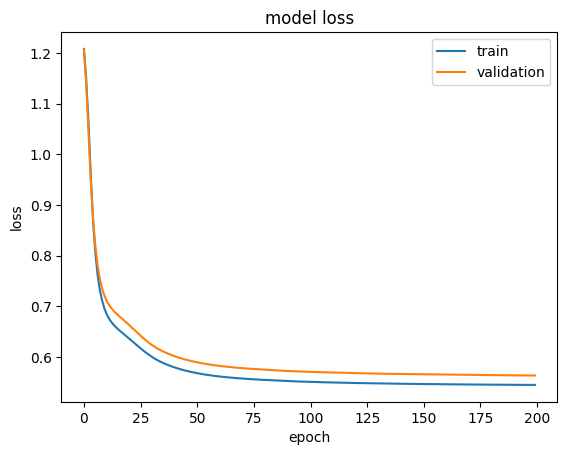

In [19]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

In [20]:
from sklearn.metrics import classification_report


y_pred_prob = classifier.predict(X_test_encoded)

#converting to class labels
y_pred = y_pred_prob.argmax(axis=1)  #getting class with highest probability

print(classification_report(y_test, y_pred, digits=4))

42/42 [==============================] - 0s 829us/step
              precision    recall  f1-score   support

           0     0.3313    0.3303    0.3308       333
           1     0.6520    0.6488    0.6504       615
           2     0.5474    0.5532    0.5503       376

    accuracy                         0.5415      1324
   macro avg     0.5102    0.5108    0.5105      1324
weighted avg     0.5416    0.5415    0.5416      1324

